# Credit EDA Case Study

### 1.Import Requried Libraries

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For displaying all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
app_data=pd.read_csv(r"C:\Users\Prabitha's PC\Documents\DS2021\EDA\Eda case study dataset\application_data.csv")
app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.Inspecting Application_data

In [3]:
app_data.shape

(307511, 122)

In [4]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 3.Checking for null values

#### 3.1 checking for percentage of null values in each columns

In [6]:
(app_data.isnull().sum()/len(app_data.index)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Columns like COMMONAREA_MEDI,COMMONAREA_AVG,LANDAREA_MODE,ELEVATORS_MEDI,and many more have null values higher than 50% as shown above.Since they will not contribute much to further studies we can drop those columns.

In [7]:
## drop columns with nullvalues higher than 50%
app_data=app_data[app_data.columns[app_data.isnull().sum()/len(app_data.index)<=.50]]

In [8]:
# checking shape of dataframe after removing columns with null values more than 50%.We have lost 41 columns.
app_data.shape

(307511, 81)

In [9]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [10]:
## Again checking null values in the dataframe..
(app_data.isnull().sum()/len(app_data.index)*100).sort_values()

SK_ID_CURR                       0.000000
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

There are some columns with null value around 13%.We can just look into those values and handle them by imputation method. AS per the above data these columns have null values around 13%.

AMT_REQ_CREDIT_BUREAU_HOUR<br>
AMT_REQ_CREDIT_BUREAU_DAY<br>
AMT_REQ_CREDIT_BUREAU_WEEK<br>
AMT_REQ_CREDIT_BUREAU_MON<br>
AMT_REQ_CREDIT_BUREAU_QRT<br>
AMT_REQ_CREDIT_BUREAU_YEAR<br>

#### 3.2 Subseting and cleaning of data

1.Select columns required for analysis.

2.Handling of null values by imputation,or deletion

In [11]:
# using nunique() we can find Count of number of distinct elements in specified axis in a pandas object.
app_data.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

We consider following columns for analysis.So subsetting these columns from main dataframe is done as apart of study.

In [12]:
app_subset=app_data[['TARGET',
                    'SK_ID_CURR',
                    'NAME_CONTRACT_TYPE',
                    'CODE_GENDER',
                    'AMT_INCOME_TOTAL',
                    'NAME_TYPE_SUITE',
                    'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE',
                    'DAYS_EMPLOYED',
                    'OCCUPATION_TYPE',
                    'ORGANIZATION_TYPE',
                    'AMT_REQ_CREDIT_BUREAU_HOUR',
                    'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_MON',
                    'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR',
                    'AMT_GOODS_PRICE',
                    'AMT_CREDIT',
                    'AMT_ANNUITY',
                    'DAYS_BIRTH',
                    'EMERGENCYSTATE_MODE',
                    'NAME_FAMILY_STATUS',
                    'FLAG_OWN_REALTY',
                    'REGION_RATING_CLIENT_W_CITY',
                    'DEF_60_CNT_SOCIAL_CIRCLE',
                    'DEF_30_CNT_SOCIAL_CIRCLE',
                    'CNT_CHILDREN',
                    'CNT_FAM_MEMBERS']]

#### 3.3 Handling null values

In [13]:
app_subset.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<AxesSubplot:>

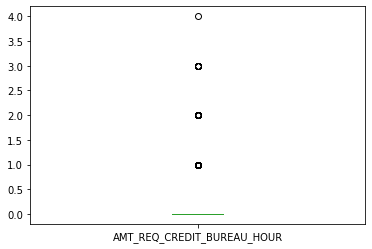

In [14]:
app_subset.AMT_REQ_CREDIT_BUREAU_HOUR.plot(kind="box")

For this column AMT_REQ_CREDIT_BUREAU_HOUR values of mean,median and 75th percentile are 0.00,hence we can impute nullvalues in  that columns with 0.00.

In [15]:
app_subset.AMT_REQ_CREDIT_BUREAU_DAY.describe()   

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<AxesSubplot:>

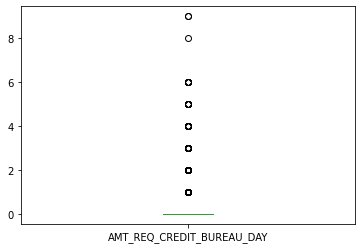

In [16]:
app_subset.AMT_REQ_CREDIT_BUREAU_DAY.plot(kind="box") 

In [17]:
app_subset.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<AxesSubplot:>

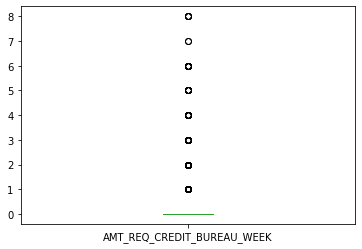

In [18]:
app_subset.AMT_REQ_CREDIT_BUREAU_WEEK.plot(kind="box")

In [19]:
app_subset.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<AxesSubplot:>

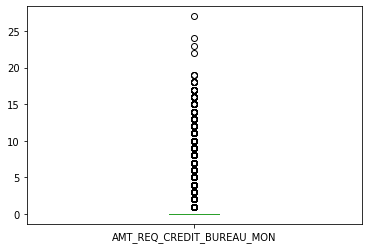

In [20]:
app_subset.AMT_REQ_CREDIT_BUREAU_MON.plot(kind="box")

In [21]:
app_subset.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<AxesSubplot:>

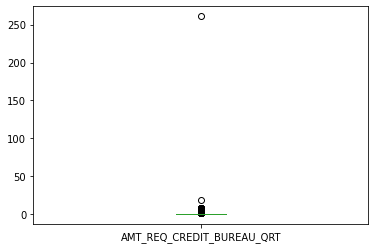

In [22]:
app_subset.AMT_REQ_CREDIT_BUREAU_QRT.plot(kind="box")

AMT_REQ_CREDIT_BUREAU_DAY<br>
AMT_REQ_CREDIT_BUREAU_WEEK<br>
AMT_REQ_CREDIT_BUREAU_MON<br>
AMT_REQ_CREDIT_BUREAU_QRT<br>

For these columns also,we can see that values of mean,median and 75th pecentile is 0.00.hence here also we can impute with 0.00

In [23]:
app_subset.AMT_REQ_CREDIT_BUREAU_YEAR.describe()


count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<AxesSubplot:>

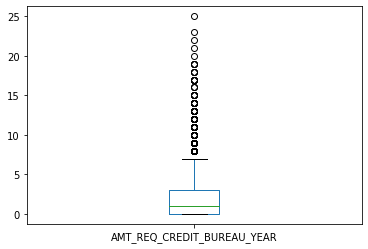

In [24]:
app_subset.AMT_REQ_CREDIT_BUREAU_YEAR.plot(kind="box")

For this column also we can impute with 0

In [25]:
app_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   SK_ID_CURR                   307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   AMT_INCOME_TOTAL             307511 non-null  float64
 5   NAME_TYPE_SUITE              306219 non-null  object 
 6   NAME_INCOME_TYPE             307511 non-null  object 
 7   NAME_EDUCATION_TYPE          307511 non-null  object 
 8   DAYS_EMPLOYED                307511 non-null  int64  
 9   OCCUPATION_TYPE              211120 non-null  object 
 10  ORGANIZATION_TYPE            307511 non-null  object 
 11  AMT_REQ_CREDIT_BUREAU_HOUR   265992 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_DAY    265992 non-null  float64
 13 

In [26]:
app_subset.isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE            145755
OCCUPATION_TYPE                 96391
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
NAME_TYPE_SUITE                  1292
DEF_30_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
CNT_CHILDREN                        0
AMT_CREDIT                          0
DAYS_BIRTH                          0
NAME_FAMILY_STATUS                  0
ORGANIZATION_TYPE                   0
FLAG_OWN_REALTY                     0
DAYS_EMPLOYED                       0
NAME_EDUCATION_TYPE                 0
NAME_INCOME_TYPE                    0
REGION_RATING_CLIENT_W_CITY         0
AMT_INCOME_TOTAL                    0
CODE_GENDER                         0
NAME_CONTRAC

In [27]:
app_subset.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [28]:
# We can impute null values in NAME_TYPE_SUITE column using "Unaccompanied" ,since it is most frequently occuring(~81%)
app_subset.NAME_TYPE_SUITE=app_subset.NAME_TYPE_SUITE.replace(np.nan,"Unaccompanied")

In [29]:
app_subset.NAME_TYPE_SUITE.isnull().sum()

0

In [30]:
app_subset.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

OCCUPATION_TYPE column have 31.35 % null values.Looking at the value counts of these column,it is clear that we can not replace null values with any of specific value in the occupation_type column.So it is better to replace null values into a different category called "Others".

In [31]:
app_subset.OCCUPATION_TYPE=app_subset.OCCUPATION_TYPE.replace(np.nan,"Others")
app_subset.OCCUPATION_TYPE.value_counts(normalize=True)

Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

Now we can treat columns like 

AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR 

As we already seen that for these columns have same mean,median values.We can impute them using value of 0.00 

In [32]:
app_subset.AMT_REQ_CREDIT_BUREAU_HOUR=app_subset.AMT_REQ_CREDIT_BUREAU_HOUR.replace(np.nan,0)
app_subset.AMT_REQ_CREDIT_BUREAU_DAY=app_subset.AMT_REQ_CREDIT_BUREAU_DAY.replace(np.nan,0)
app_subset.AMT_REQ_CREDIT_BUREAU_WEEK=app_subset.AMT_REQ_CREDIT_BUREAU_WEEK.replace(np.nan,0)
app_subset.AMT_REQ_CREDIT_BUREAU_MON=app_subset.AMT_REQ_CREDIT_BUREAU_MON.replace(np.nan,0)
app_subset.AMT_REQ_CREDIT_BUREAU_QRT=app_subset.AMT_REQ_CREDIT_BUREAU_QRT.replace(np.nan,0)
app_subset.AMT_REQ_CREDIT_BUREAU_YEAR=app_subset.AMT_REQ_CREDIT_BUREAU_YEAR.replace(np.nan,0)


In [33]:
# AGAIN CHECKING FOR NULL VALUES.
app_subset.isnull().sum().sort_values(ascending=False)

EMERGENCYSTATE_MODE            145755
DEF_30_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
OCCUPATION_TYPE                     0
DAYS_EMPLOYED                       0
NAME_EDUCATION_TYPE                 0
NAME_INCOME_TYPE                    0
AMT_INCOME_TOTAL                    0
NAME_TYPE_SUITE                     0
AMT_REQ_CREDIT_BUREAU_HOUR          0
CODE_GENDER                         0
NAME_CONTRACT_TYPE                  0
SK_ID_CURR                          0
ORGANIZATION_TYPE                   0
AMT_REQ_CREDIT_BUREAU_MON           0
AMT_REQ_CREDIT_BUREAU_DAY           0
AMT_REQ_CREDIT_BUREAU_WEEK          0
CNT_CHILDREN                        0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_YEAR          0
AMT_CREDIT                          0
DAYS_BIRTH                          0
NAME_FAMILY_STATUS                  0
FLAG_OWN_REA

In [34]:
app_subset.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [35]:
app_subset.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

<AxesSubplot:>

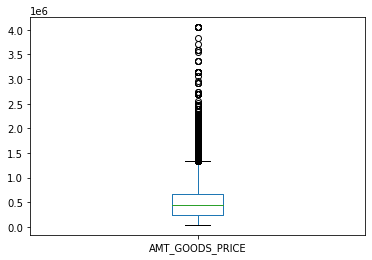

In [36]:
# AMT_GOODS_PRICE is a continuous variable.we have to check for outliers.
app_subset.AMT_GOODS_PRICE.plot(kind="box")

Since there are some ouliers in AMT_GOODS_PRICE column, we can impute null values in those columns with median value

In [37]:
app_subset.AMT_GOODS_PRICE.median()

450000.0

In [38]:
# imputing with median for AMT_GOODS_PRICE column.
app_subset.AMT_GOODS_PRICE=app_subset.AMT_GOODS_PRICE.replace(np.nan,app_subset.AMT_GOODS_PRICE.median())

In [39]:
app_subset.AMT_GOODS_PRICE.isnull().sum()

0

In [40]:
app_subset.AMT_ANNUITY.describe()


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [41]:
app_subset.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

Here also we can impute these columns with their median values.

In [42]:
## imputing null values in AMT_ANNUITY column
app_subset.AMT_ANNUITY.median()


24903.0

In [43]:
app_subset.AMT_ANNUITY=app_subset.AMT_ANNUITY.replace(np.nan,app_subset.AMT_ANNUITY.median())

In [44]:
#imputing null values in CNT_FAM_MEMBERS column
app_subset.CNT_FAM_MEMBERS.median()
app_subset.CNT_FAM_MEMBERS=app_subset.CNT_FAM_MEMBERS.replace(np.nan,app_subset.CNT_FAM_MEMBERS.median())

In [45]:
# Again checking for null values
app_subset.isnull().sum()

TARGET                              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
AMT_INCOME_TOTAL                    0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
DAYS_EMPLOYED                       0
OCCUPATION_TYPE                     0
ORGANIZATION_TYPE                   0
AMT_REQ_CREDIT_BUREAU_HOUR          0
AMT_REQ_CREDIT_BUREAU_DAY           0
AMT_REQ_CREDIT_BUREAU_WEEK          0
AMT_REQ_CREDIT_BUREAU_MON           0
AMT_REQ_CREDIT_BUREAU_QRT           0
AMT_REQ_CREDIT_BUREAU_YEAR          0
AMT_GOODS_PRICE                     0
AMT_CREDIT                          0
AMT_ANNUITY                         0
DAYS_BIRTH                          0
EMERGENCYSTATE_MODE            145755
NAME_FAMILY_STATUS                  0
FLAG_OWN_REALTY                     0
REGION_RATING_CLIENT_W_CITY         0
DEF_60_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_S

Now we have left with these three columns.

"DEF_60_CNT_SOCIAL_CIRCLE" ,"DEF_30_CNT_SOCIAL_CIRCLE","EMERGENCYSTATE_MODE"


In [46]:
app_subset.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [47]:
app_subset.DEF_30_CNT_SOCIAL_CIRCLE.describe()


count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

 for column like "DEF_60_CNT_SOCIAL_CIRCLE" ,"DEF_30_CNT_SOCIAL_CIRCLE" can imputed with median value.

In [48]:
app_subset.DEF_60_CNT_SOCIAL_CIRCLE=app_subset.DEF_60_CNT_SOCIAL_CIRCLE.replace(np.nan,app_subset.DEF_60_CNT_SOCIAL_CIRCLE.median())
app_subset.DEF_30_CNT_SOCIAL_CIRCLE=app_subset.DEF_30_CNT_SOCIAL_CIRCLE.replace(np.nan,app_subset.DEF_30_CNT_SOCIAL_CIRCLE.median())


In [49]:
app_subset.EMERGENCYSTATE_MODE.value_counts(normalize=True)

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

In [50]:
# null values in EMERGENCYSTATE_MODE column can be imputed with "No",since it is the most commonly obseved type.
app_subset.EMERGENCYSTATE_MODE=app_subset.EMERGENCYSTATE_MODE.replace(np.nan,"No")

In [51]:
app_subset.isnull().sum()

TARGET                         0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
AMT_INCOME_TOTAL               0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
ORGANIZATION_TYPE              0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
AMT_GOODS_PRICE                0
AMT_CREDIT                     0
AMT_ANNUITY                    0
DAYS_BIRTH                     0
EMERGENCYSTATE_MODE            0
NAME_FAMILY_STATUS             0
FLAG_OWN_REALTY                0
REGION_RATING_CLIENT_W_CITY    0
DEF_60_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
CNT_CHILDREN                   0
CNT_FAM_MEMBERS                0
dtype: int64

Now we handled all null values.Next we can look for datatypes of various columns datatype of all numeric fields should be float or integer type ,and for categorical variables it should be object type.

#### 3.4 Check Datatypes of columns

In [52]:
app_subset.dtypes

TARGET                           int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
AMT_INCOME_TOTAL               float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE                 object
ORGANIZATION_TYPE               object
AMT_REQ_CREDIT_BUREAU_HOUR     float64
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
AMT_GOODS_PRICE                float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
DAYS_BIRTH                       int64
EMERGENCYSTATE_MODE             object
NAME_FAMILY_STATUS              object
FLAG_OWN_REALTY                 object
REGION_RATING_CLIENT_W_CITY      int64
DEF_60_CNT_SOCIAL_CIRCLE 

In [53]:
# CONVERTING DATATYPE OF DAY,MONTH,YEAR,HOUR,WEEK COLUMN INTO INT64 TYPE

app_subset.AMT_REQ_CREDIT_BUREAU_HOUR=app_subset.AMT_REQ_CREDIT_BUREAU_HOUR.astype("int")
app_subset.AMT_REQ_CREDIT_BUREAU_DAY=app_subset.AMT_REQ_CREDIT_BUREAU_DAY.astype("int")
app_subset.AMT_REQ_CREDIT_BUREAU_WEEK=app_subset.AMT_REQ_CREDIT_BUREAU_WEEK.astype("int")
app_subset.AMT_REQ_CREDIT_BUREAU_MON=app_subset.AMT_REQ_CREDIT_BUREAU_MON.astype("int")
app_subset.AMT_REQ_CREDIT_BUREAU_QRT=app_subset.AMT_REQ_CREDIT_BUREAU_QRT.astype("int")
app_subset.AMT_REQ_CREDIT_BUREAU_YEAR=app_subset.AMT_REQ_CREDIT_BUREAU_YEAR.astype("int")

In [54]:
app_subset.dtypes

TARGET                           int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
AMT_INCOME_TOTAL               float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE                 object
ORGANIZATION_TYPE               object
AMT_REQ_CREDIT_BUREAU_HOUR       int32
AMT_REQ_CREDIT_BUREAU_DAY        int32
AMT_REQ_CREDIT_BUREAU_WEEK       int32
AMT_REQ_CREDIT_BUREAU_MON        int32
AMT_REQ_CREDIT_BUREAU_QRT        int32
AMT_REQ_CREDIT_BUREAU_YEAR       int32
AMT_GOODS_PRICE                float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
DAYS_BIRTH                       int64
EMERGENCYSTATE_MODE             object
NAME_FAMILY_STATUS              object
FLAG_OWN_REALTY                 object
REGION_RATING_CLIENT_W_CITY      int64
DEF_60_CNT_SOCIAL_CIRCLE 

#### 3.5.Outliers analysis

#### 3.5.1 Checking for numeric variables for outlier analysis

In [55]:
app_subset.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EMERGENCYSTATE_MODE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS
0,1,100002,Cash loans,M,202500.0,Unaccompanied,Working,Secondary / secondary special,-637,Laborers,Business Entity Type 3,0,0,0,0,0,1,351000.0,406597.5,24700.5,-9461,No,Single / not married,Y,2,2.0,2.0,0,1.0
1,0,100003,Cash loans,F,270000.0,Family,State servant,Higher education,-1188,Core staff,School,0,0,0,0,0,0,1129500.0,1293502.5,35698.5,-16765,No,Married,N,1,0.0,0.0,0,2.0
2,0,100004,Revolving loans,M,67500.0,Unaccompanied,Working,Secondary / secondary special,-225,Laborers,Government,0,0,0,0,0,0,135000.0,135000.0,6750.0,-19046,No,Single / not married,Y,2,0.0,0.0,0,1.0
3,0,100006,Cash loans,F,135000.0,Unaccompanied,Working,Secondary / secondary special,-3039,Laborers,Business Entity Type 3,0,0,0,0,0,0,297000.0,312682.5,29686.5,-19005,No,Civil marriage,Y,2,0.0,0.0,0,2.0
4,0,100007,Cash loans,M,121500.0,Unaccompanied,Working,Secondary / secondary special,-3038,Core staff,Religion,0,0,0,0,0,0,513000.0,513000.0,21865.5,-19932,No,Single / not married,Y,2,0.0,0.0,0,1.0


Columns like 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE' have to be studied for our analysis.

In [56]:
columns=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
app_subset_check_outlier=app_subset[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

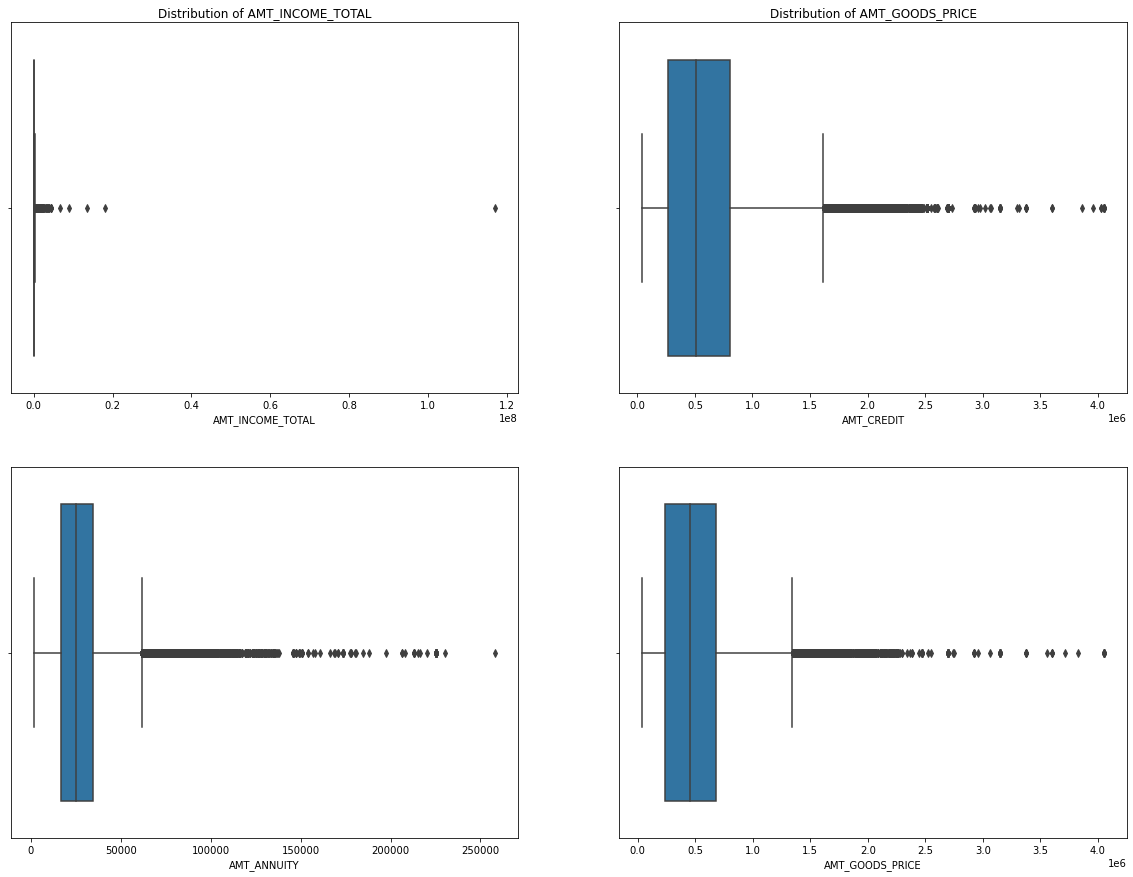

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax[0][0].set_title("Distribution of AMT_INCOME_TOTAL",fontsize=12)
res1=app_subset_check_outlier.AMT_INCOME_TOTAL
res1=pd.Series(res1)
sns.boxplot(res1,ax=ax[0][0])

ax[0][1].set_title("Distribution of AMT_CREDIT",fontsize=12)
res2=app_subset_check_outlier.AMT_CREDIT
res2=pd.Series(res2)
sns.boxplot(res2,ax=ax[0][1])

ax[0][1].set_title("Distribution of ANNUITY",fontsize=12)
res3=app_subset_check_outlier.AMT_ANNUITY
res3=pd.Series(res3)
sns.boxplot(res3,ax=ax[1][0])

ax[0][1].set_title("Distribution of AMT_GOODS_PRICE",fontsize=12)
res4=app_subset_check_outlier.AMT_GOODS_PRICE
res4=pd.Series(res4)
sns.boxplot(res4,ax=ax[1][1])
plt.show()


From the above boxplots it is clear that there are some outliers in these columns.So we have to treat these outliers.


#### 3.5.2 Treating outliers.

In [58]:
app_subset.AMT_INCOME_TOTAL.quantile([0.7,0.75,0.8,0.9,0.95,0.99,1])

0.70       180000.0
0.75       202500.0
0.80       225000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [59]:
app_subset.AMT_CREDIT.quantile([0.7,0.75,0.8,0.9,0.95,0.99,1])

0.70     755190.0
0.75     808650.0
0.80     900000.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

In [60]:
app_subset.AMT_ANNUITY.quantile([0.7,0.75,0.8,0.9,0.95,0.99,1])

0.70     32004.0
0.75     34596.0
0.80     37516.5
0.90     45954.0
0.95     53325.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [61]:
app_subset.AMT_GOODS_PRICE.quantile([0.7,0.75,0.8,0.9,0.95,0.99,1])

0.70     675000.0
0.75     679500.0
0.80     814500.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

Looking at the summary statistics,and details of data,it is better to treat outliers in these 4 columns by imputing with median value

In [62]:
### Function to treat outliers
import statistics as sts
def outliers_column(df,columns):
    for i in columns:
        df_array=np.array(df[i])
        final_list=[]
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        LTV= Q1 - (1.5 * IQR)
        UTV= Q3 + (1.5 * IQR)
        for item in df_array:
            if item <= LTV or item>=UTV:
                final_list.append(sts.median(df_array))
            else:
                final_list.append(item)
        df[i]=final_list
    return df

In [63]:
## Using this function select few rows for outlier analysis
app_subset_outliers=outliers_column(app_subset_check_outlier.head(20000),columns)

In [64]:
app_subset_outliers.AMT_INCOME_TOTAL.describe()

count     20000.000000
mean     152825.596306
std       61368.408073
min       25650.000000
25%      112500.000000
50%      148500.000000
75%      180000.000000
max      336835.935000
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

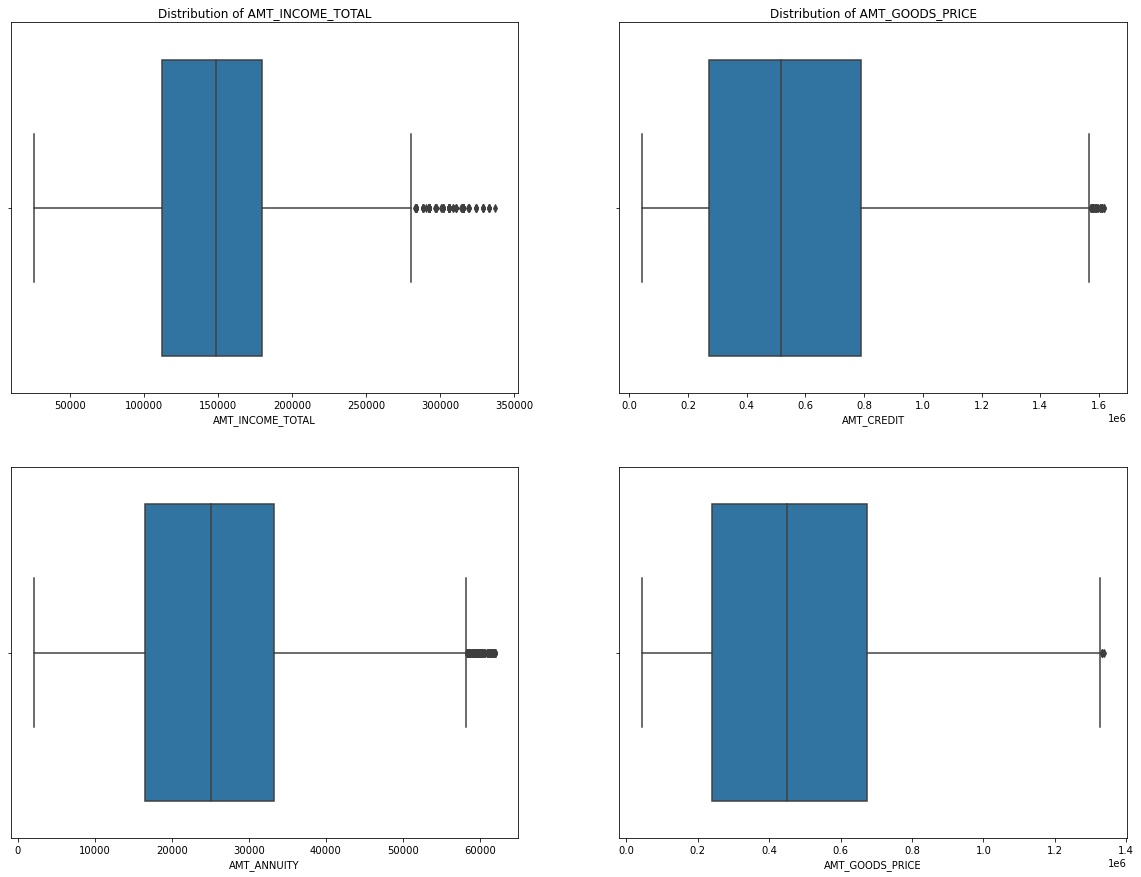

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

ax[0][0].set_title("Distribution of AMT_INCOME_TOTAL",fontsize=12)
income_amnt=app_subset_outliers.AMT_INCOME_TOTAL
income_amnt=pd.Series(income_amnt)
sns.boxplot(income_amnt,ax=ax[0][0])

ax[0][1].set_title("Distribution of AMT_CREDIT",fontsize=12)
crd_amnt=app_subset_outliers.AMT_CREDIT
crd_amnt=pd.Series(crd_amnt)
sns.boxplot(crd_amnt,ax=ax[0][1])

ax[0][1].set_title("Distribution of ANNUITY",fontsize=12)
annuity_amnt=app_subset_outliers.AMT_ANNUITY
annuity_amnt=pd.Series(annuity_amnt)
sns.boxplot(annuity_amnt,ax=ax[1][0])

ax[0][1].set_title("Distribution of AMT_GOODS_PRICE",fontsize=12)
goods_price_amnt=app_subset_outliers.AMT_GOODS_PRICE
goods_price_amnt=pd.Series(goods_price_amnt)
sns.boxplot(goods_price_amnt,ax=ax[1][1])

#### Observations:

AMT_GOOD_PRICE,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL for these columns we have imputed extreme values with their corresponding median value.Now we can see that there are no more outliers in these columns.

In [66]:
app_subset.dtypes

TARGET                           int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
AMT_INCOME_TOTAL               float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE                 object
ORGANIZATION_TYPE               object
AMT_REQ_CREDIT_BUREAU_HOUR       int32
AMT_REQ_CREDIT_BUREAU_DAY        int32
AMT_REQ_CREDIT_BUREAU_WEEK       int32
AMT_REQ_CREDIT_BUREAU_MON        int32
AMT_REQ_CREDIT_BUREAU_QRT        int32
AMT_REQ_CREDIT_BUREAU_YEAR       int32
AMT_GOODS_PRICE                float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
DAYS_BIRTH                       int64
EMERGENCYSTATE_MODE             object
NAME_FAMILY_STATUS              object
FLAG_OWN_REALTY                 object
REGION_RATING_CLIENT_W_CITY      int64
DEF_60_CNT_SOCIAL_CIRCLE 

#### 3.6 Binning the continuous variable

Now creating bins for continuous variables AMT_CREDIT and AMT_INCOME_TOTAL

In [67]:
# create bins for  income amount
bins_inc = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot_inc = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
app_subset["AMT_INCOME_Binned"]=pd.cut(app_subset.AMT_INCOME_TOTAL,bins_inc,labels=slot_inc)

In [68]:
app_subset.AMT_INCOME_Binned.head()

0    200000-225000
1    250000-275000
2      50000-75000
3    125000-150000
4    100000-125000
Name: AMT_INCOME_Binned, dtype: category
Categories (21, object): ['0-25000' < '25000-50000' < '50000-75000' < '75000,100000' ... '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above']

In [69]:
## bins for credit amount

bins_cr = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots_cr = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
app_subset["AMT_CREDIT_Binned"]=pd.cut(app_subset.AMT_CREDIT,bins_cr,labels=slots_cr)


In [70]:
app_subset.AMT_CREDIT_Binned.head()

0       400000-450000
1    900000 and above
2            0-150000
3       300000-350000
4       500000-550000
Name: AMT_CREDIT_Binned, dtype: category
Categories (17, object): ['0-150000' < '150000-200000' < '200000-250000' < '250000-300000' ... '750000-800000' < '800000-850000' < '850000-900000' < '900000 and above']

In [71]:
app_subset.dtypes

TARGET                            int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
AMT_INCOME_TOTAL                float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
DAYS_EMPLOYED                     int64
OCCUPATION_TYPE                  object
ORGANIZATION_TYPE                object
AMT_REQ_CREDIT_BUREAU_HOUR        int32
AMT_REQ_CREDIT_BUREAU_DAY         int32
AMT_REQ_CREDIT_BUREAU_WEEK        int32
AMT_REQ_CREDIT_BUREAU_MON         int32
AMT_REQ_CREDIT_BUREAU_QRT         int32
AMT_REQ_CREDIT_BUREAU_YEAR        int32
AMT_GOODS_PRICE                 float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
DAYS_BIRTH                        int64
EMERGENCYSTATE_MODE              object
NAME_FAMILY_STATUS               object
FLAG_OWN_REALTY                  object
REGION_RATING_CLIENT_W_CITY       int64


### 4.Analysing variables

#### 4.1.checking imbalance

In [72]:
app_subset.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EMERGENCYSTATE_MODE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_Binned,AMT_CREDIT_Binned
0,1,100002,Cash loans,M,202500.0,Unaccompanied,Working,Secondary / secondary special,-637,Laborers,Business Entity Type 3,0,0,0,0,0,1,351000.0,406597.5,24700.5,-9461,No,Single / not married,Y,2,2.0,2.0,0,1.0,200000-225000,400000-450000
1,0,100003,Cash loans,F,270000.0,Family,State servant,Higher education,-1188,Core staff,School,0,0,0,0,0,0,1129500.0,1293502.5,35698.5,-16765,No,Married,N,1,0.0,0.0,0,2.0,250000-275000,900000 and above
2,0,100004,Revolving loans,M,67500.0,Unaccompanied,Working,Secondary / secondary special,-225,Laborers,Government,0,0,0,0,0,0,135000.0,135000.0,6750.0,-19046,No,Single / not married,Y,2,0.0,0.0,0,1.0,50000-75000,0-150000
3,0,100006,Cash loans,F,135000.0,Unaccompanied,Working,Secondary / secondary special,-3039,Laborers,Business Entity Type 3,0,0,0,0,0,0,297000.0,312682.5,29686.5,-19005,No,Civil marriage,Y,2,0.0,0.0,0,2.0,125000-150000,300000-350000
4,0,100007,Cash loans,M,121500.0,Unaccompanied,Working,Secondary / secondary special,-3038,Core staff,Religion,0,0,0,0,0,0,513000.0,513000.0,21865.5,-19932,No,Single / not married,Y,2,0.0,0.0,0,1.0,100000-125000,500000-550000


In [73]:
app_subset.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

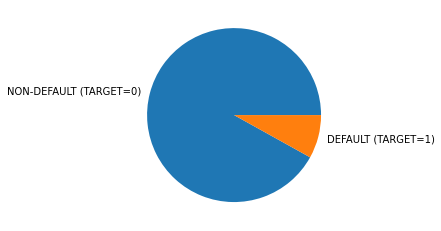

In [74]:
plt.pie(app_subset.TARGET.value_counts(normalize=True),labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'])
plt.show()

#### Observations:
TARGET has 2 values 1 and 0.<br>
1 shows - client with payment difficulties.<br>
0 shows- client who will not make any default.<br>
Around 91% client will pay loan on time,while around 8% client shows tendancy to default payment.

In [75]:
## we can subset data based on target into 2 set.target_Yes,and target_NO

app_target_Yes=app_subset[app_subset["TARGET"]==1] ## Defaulter_clients
app_target_No=app_subset[app_subset["TARGET"]==0]  ## Non-defaulters


#### 4.1 Univariate Analysis

#### 4.1.1 Univariate analysis  TARGET variable with NAME_CONTRACT_TYPE

In [76]:
app_target_Yes.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EMERGENCYSTATE_MODE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_Binned,AMT_CREDIT_Binned
0,1,100002,Cash loans,M,202500.0,Unaccompanied,Working,Secondary / secondary special,-637,Laborers,Business Entity Type 3,0,0,0,0,0,1,351000.0,406597.5,24700.5,-9461,No,Single / not married,Y,2,2.0,2.0,0,1.0,200000-225000,400000-450000
26,1,100031,Cash loans,F,112500.0,Unaccompanied,Working,Secondary / secondary special,-2628,Cooking staff,Business Entity Type 3,0,0,0,0,2,2,702000.0,979992.0,27076.5,-18724,Yes,Widow,Y,2,0.0,1.0,0,1.0,100000-125000,900000 and above
40,1,100047,Cash loans,M,202500.0,Unaccompanied,Commercial associate,Secondary / secondary special,-1262,Laborers,Business Entity Type 3,0,0,0,2,0,4,855000.0,1193580.0,35028.0,-17482,No,Married,Y,2,0.0,0.0,0,2.0,200000-225000,900000 and above
42,1,100049,Cash loans,F,135000.0,Unaccompanied,Working,Secondary / secondary special,-3597,Sales staff,Self-employed,0,0,0,0,0,2,238500.0,288873.0,16258.5,-13384,No,Civil marriage,N,3,0.0,0.0,0,2.0,125000-150000,250000-300000
81,1,100096,Cash loans,F,81000.0,Unaccompanied,Pensioner,Secondary / secondary special,365243,Others,XNA,0,0,0,0,0,0,252000.0,252000.0,14593.5,-24794,No,Married,Y,2,1.0,1.0,0,2.0,"75000,100000",250000-300000


In [77]:
app_target_Yes.NAME_CONTRACT_TYPE.value_counts()

Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

In [78]:
app_target_No.NAME_CONTRACT_TYPE.value_counts()

Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

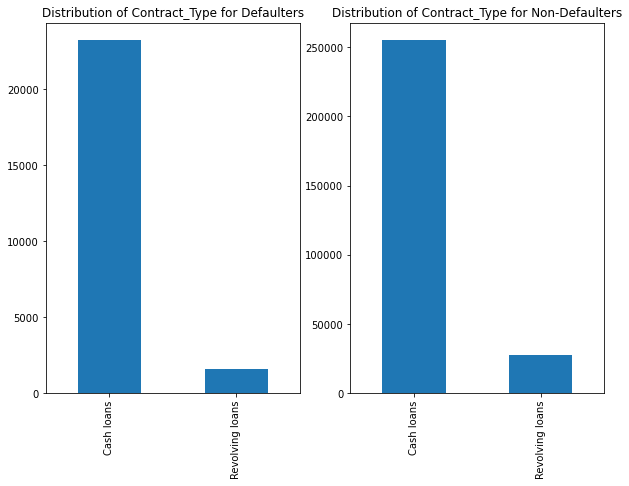

In [79]:
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
app_target_Yes.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title("Distribution of Contract_Type for Defaulters")
plt.subplot(2,2,2)
app_target_No.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title("Distribution of Contract_Type for Non-Defaulters")
plt.show()

Observation:Cash loans have more tendancy to default than revolving loans.

#### 4.1.2.Analysing NAME_INCOME_TYPE

In [80]:
app_target_Yes.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

In [81]:
app_target_No.NAME_INCOME_TYPE.value_counts(normalize=True)


Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

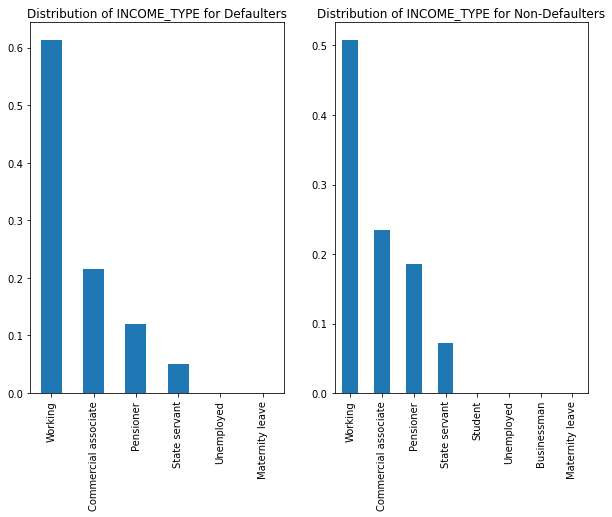

In [82]:
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
app_target_Yes.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of INCOME_TYPE for Defaulters")
plt.subplot(2,2,2)
app_target_No.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of INCOME_TYPE for Non-Defaulters")
plt.show()

##### Observations:
            It is observed that Students and Businessmen are in non-defaulters group.
            Working people contribute 50% to non defaulters group,while 61% of them make deafault.
            This means that chances for defaulting is high in working class people.

#### 4.1.3 Analysing Education Type for Target variable

In [83]:
app_target_Yes.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [84]:
app_target_No.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

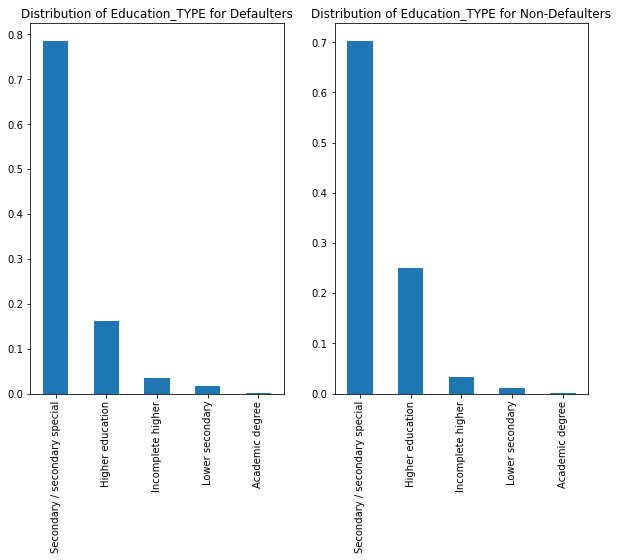

In [85]:
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
app_target_Yes.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of Education_TYPE for Defaulters")
plt.subplot(2,2,2)
app_target_No.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of Education_TYPE for Non-Defaulters")
plt.show()

##### Observations:
             Highly educated people with Academic degree less likely to default.
             It seems like People with secondary/secondary_special education have tendency to default.

#### 4.1.4 Analysing Gender for Target variable

In [86]:
app_target_Yes.CODE_GENDER.value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

In [87]:
app_target_No.CODE_GENDER.value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

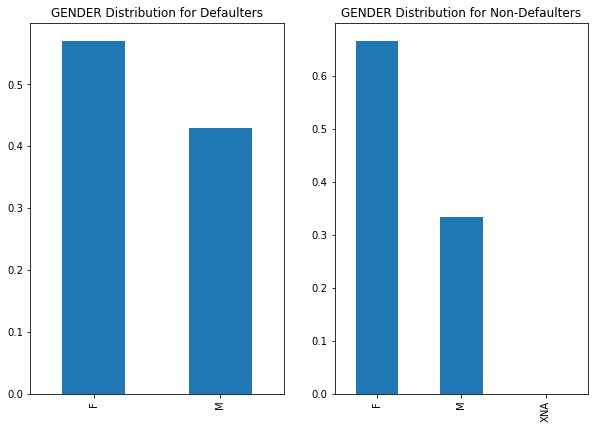

In [88]:
plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
app_target_Yes.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title("GENDER Distribution for Defaulters")
plt.subplot(2,2,2)
app_target_No.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.title("GENDER Distribution for Non-Defaulters")
plt.show()

#### Obsevations:  
              67% Females contribute non-defaulters while 57% fail to make payment.
              33% Male client contribute to non-defaulters while 42% fail to do payment.
              We can see that more females are applying for loan.
              Rate of defaulting is found to be high for males than females.

#### 4.1.5 Analysing ORGANIZATION_TYPE for Target variable

In [89]:
app_target_Yes.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    6323
Self-employed             3908
XNA                       2990
Other                     1275
Business Entity Type 2     900
Construction               785
Trade: type 7              740
Medicine                   737
Government                 726
School                     526
Transport: type 4          501
Business Entity Type 1     487
Kindergarten               484
Trade: type 3              361
Industry: type 3           348
Security                   324
Agriculture                257
Housing                    235
Industry: type 11          234
Industry: type 9           225
Restaurant                 212
Transport: type 3          187
Postal                     182
Transport: type 2          172
Military                   135
Trade: type 2              133
Bank                       130
Police                     117
Industry: type 1           115
Industry: type 7           105
Services                   104
Security Ministries         96
Industry

In [90]:
app_target_No.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    61669
XNA                       52384
Self-employed             34504
Other                     15408
Medicine                  10456
Government                 9678
Business Entity Type 2     9653
School                     8367
Trade: type 7              7091
Kindergarten               6396
Construction               5936
Business Entity Type 1     5497
Transport: type 4          4897
Industry: type 9           3143
Trade: type 3              3131
Industry: type 3           2930
Security                   2923
Housing                    2723
Military                   2499
Industry: type 11          2470
Bank                       2377
Police                     2224
Agriculture                2197
Transport: type 2          2032
Postal                     1975
Security Ministries        1878
Trade: type 2              1767
Restaurant                 1599
Services                   1471
University                 1262
Industry: type 7           1202
Transpor

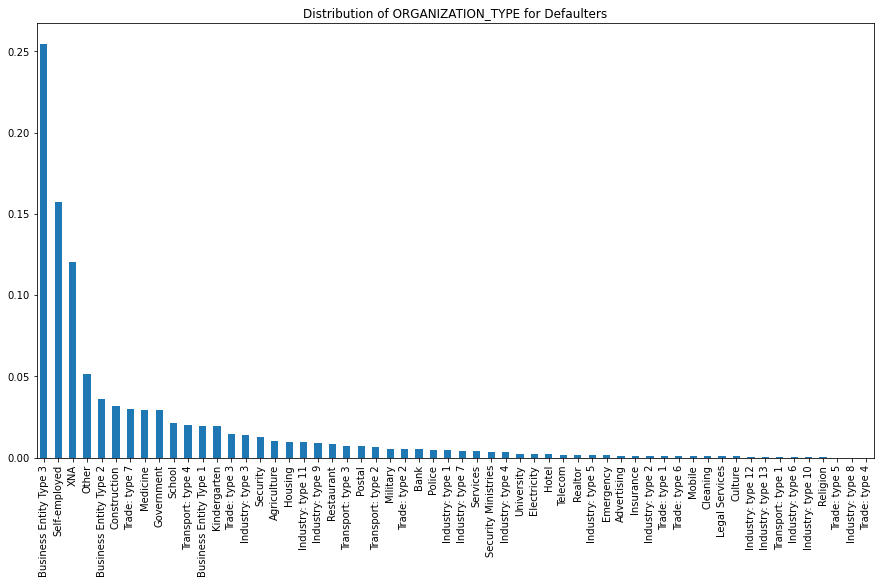

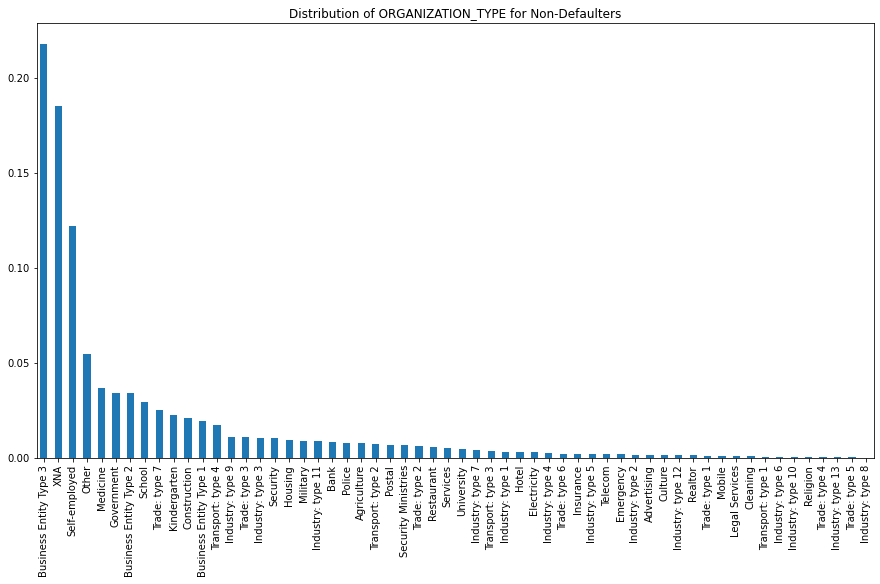

In [91]:
plt.figure(figsize=(15,8))
app_target_Yes.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of ORGANIZATION_TYPE for Defaulters")
plt.show()
plt.figure(figsize=(15,8))
app_target_No.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title("Distribution of ORGANIZATION_TYPE for Non-Defaulters")
plt.show()

#### Observations:

     Business Entity Type 3 contribute higher in defaulters,followed by self-employed.
     All other classes show almost similar distribution among defaulters and non-defaulters group.
     

#### 4.1.6 Analysing NAME_FAMILY_STATUS for Target variable

In [92]:
app_target_Yes.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: NAME_FAMILY_STATUS, dtype: float64

In [93]:
app_target_No.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.642345
Single / not married    0.144991
Civil marriage          0.094854
Separated               0.064206
Widow                   0.053597
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

Plot for defaulters


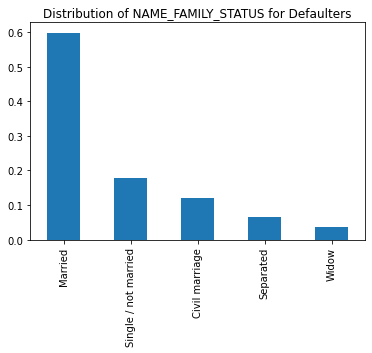

Plot for non-defaulters


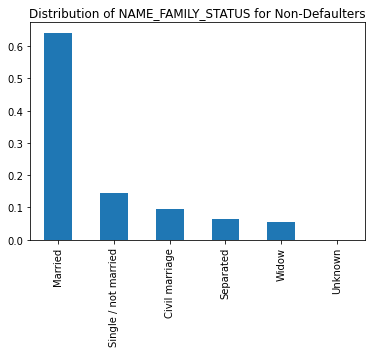

In [94]:
print("Plot for defaulters")
app_target_Yes.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Distribution of NAME_FAMILY_STATUS for Defaulters")
plt.show()
print("Plot for non-defaulters")
app_target_No.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title("Distribution of NAME_FAMILY_STATUS for Non-Defaulters")
plt.show()

 ##### Observations: 
Married people contribute high in both cases,It means that they take more loan compared to others.But rate of defaulting is less.<br>

Single/non_married class contribute 17% defaulters ,so more risk is associated with them.
      

#### 4.2 Analysis of categorical variables

In [95]:
app_subset.dtypes

TARGET                            int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
AMT_INCOME_TOTAL                float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
DAYS_EMPLOYED                     int64
OCCUPATION_TYPE                  object
ORGANIZATION_TYPE                object
AMT_REQ_CREDIT_BUREAU_HOUR        int32
AMT_REQ_CREDIT_BUREAU_DAY         int32
AMT_REQ_CREDIT_BUREAU_WEEK        int32
AMT_REQ_CREDIT_BUREAU_MON         int32
AMT_REQ_CREDIT_BUREAU_QRT         int32
AMT_REQ_CREDIT_BUREAU_YEAR        int32
AMT_GOODS_PRICE                 float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
DAYS_BIRTH                        int64
EMERGENCYSTATE_MODE              object
NAME_FAMILY_STATUS               object
FLAG_OWN_REALTY                  object
REGION_RATING_CLIENT_W_CITY       int64


Following columns are categorical variables.

NAME_TYPE_SUITE<br>
OCCUPATION_TYPE<br>
NAME_CONTRACT_TYPE<br>
CODE_GENDER<br>
NAME_INCOME_TYPE<br>
NAME_EDUCATION_TYPE<br>
ORGANIZATION_TYPE<br>

##### 4.2.3 Analysis of each  categorical variables

Analysing Target with NAME_TYPE_SUITE 

In [96]:
app_subset.groupby("NAME_TYPE_SUITE")["TARGET"].mean()

NAME_TYPE_SUITE
Children           0.073768
Family             0.074946
Group of people    0.084871
Other_A            0.087760
Other_B            0.098305
Spouse, partner    0.078716
Unaccompanied      0.081687
Name: TARGET, dtype: float64

<AxesSubplot:ylabel='NAME_TYPE_SUITE'>

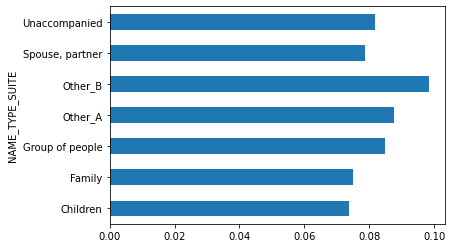

In [97]:
app_subset.groupby("NAME_TYPE_SUITE")["TARGET"].mean().plot.barh()

#### Observations:
By analysisng NAME_TYPE_SUITE with TARGET ,people belonging to other_B have more tendency to default.<br>
children shows lesser tendency to default.

In [98]:
## OCCUPATION_TYPE vs Target
app_subset.groupby("OCCUPATION_TYPE")["TARGET"].mean()

OCCUPATION_TYPE
Accountants              0.048303
Cleaning staff           0.096067
Cooking staff            0.104440
Core staff               0.063040
Drivers                  0.113261
HR staff                 0.063943
High skill tech staff    0.061599
IT staff                 0.064639
Laborers                 0.105788
Low-skill Laborers       0.171524
Managers                 0.062140
Medicine staff           0.067002
Others                   0.065131
Private service staff    0.065988
Realty agents            0.078562
Sales staff              0.096318
Secretaries              0.070498
Security staff           0.107424
Waiters/barmen staff     0.112760
Name: TARGET, dtype: float64

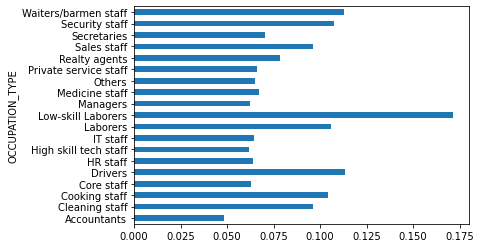

In [99]:
app_subset.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.barh()
plt.show()

#### Observations:
Low_skill laborers,waiters/barmen staffs tend to fail to make payment<br>
Accountants,managers,others,and secretaries will make payment without default, this may be because of their higher salary .

### 4.3 Finding out  correlation for numerical columns for the subset of TARGET-0,1 

In [100]:
app_subset.dtypes

TARGET                            int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
AMT_INCOME_TOTAL                float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
DAYS_EMPLOYED                     int64
OCCUPATION_TYPE                  object
ORGANIZATION_TYPE                object
AMT_REQ_CREDIT_BUREAU_HOUR        int32
AMT_REQ_CREDIT_BUREAU_DAY         int32
AMT_REQ_CREDIT_BUREAU_WEEK        int32
AMT_REQ_CREDIT_BUREAU_MON         int32
AMT_REQ_CREDIT_BUREAU_QRT         int32
AMT_REQ_CREDIT_BUREAU_YEAR        int32
AMT_GOODS_PRICE                 float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
DAYS_BIRTH                        int64
EMERGENCYSTATE_MODE              object
NAME_FAMILY_STATUS               object
FLAG_OWN_REALTY                  object
REGION_RATING_CLIENT_W_CITY       int64


In [101]:
print("Correlation for Target_1 (Defaulters)")
app_target_1=app_target_Yes[["AMT_INCOME_TOTAL", 'AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT','DAYS_EMPLOYED','CNT_FAM_MEMBERS','DAYS_BIRTH','CNT_CHILDREN','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']]
round(app_target_1.corr(),2)

Correlation for Target_1 (Defaulters)


,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_BIRTH,CNT_CHILDREN,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
AMT_INCOME_TOTAL,1.00,0.04,0.05,0.04,-0.01,0.01,0.00,0.00,-0.00,-0.01
AMT_GOODS_PRICE,0.04,1.00,0.75,0.98,0.00,0.05,-0.14,-0.01,-0.03,-0.02
AMT_ANNUITY,0.05,0.75,1.00,0.75,-0.08,0.08,-0.01,0.03,-0.03,-0.02
AMT_CREDIT,0.04,0.98,0.75,1.00,-0.00,0.05,-0.14,-0.00,-0.03,-0.03
DAYS_EMPLOYED,-0.01,0.00,-0.08,-0.00,1.00,-0.19,-0.58,-0.19,0.01,0.00
CNT_FAM_MEMBERS,0.01,0.05,0.08,0.05,-0.19,1.00,0.20,0.89,-0.00,0.01
DAYS_BIRTH,0.00,-0.14,-0.01,-0.14,-0.58,0.20,1.00,0.26,0.00,0.00
CNT_CHILDREN,0.00,-0.01,0.03,-0.00,-0.19,0.89,0.26,1.00,-0.01,0.00
DEF_60_CNT_SOCIAL_CIRCLE,-0.00,-0.03,-0.03,-0.03,0.01,-0.00,0.00,-0.01,1.00,0.87
DEF_30_CNT_SOCIAL_CIRCLE,-0.01,-0.02,-0.02,-0.03,0.00,0.01,0.00,0.00,0.87,1.00


Credit amount has negative correlation coefficient with Days_of_birth,cnt_of_children which means that they are inversely related to each other.

### Top 5correlation for target_1

In [102]:
app_target_1=app_target_Yes[["AMT_INCOME_TOTAL", 'AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']]

Correlation for Target_1


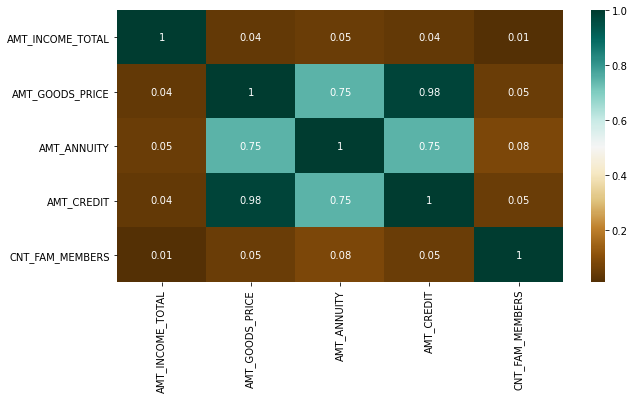

In [103]:
print("Correlation for Target_1")
plt.figure(figsize=(10,5))
sns.heatmap(round(app_target_1.corr(),2),cmap="BrBG",annot=True)
plt.show()

#### Observations:
1. Credit amount has negative correlation coefficient with Days_of_birth,cnt_of_children with means that they are inversely related to each other.
2. AMT_GOODS_PRICE and AMT_CREDIT have strong correlation with each other.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

In [104]:
app_target_0=app_target_No[["AMT_INCOME_TOTAL", 'AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT','DAYS_EMPLOYED','CNT_FAM_MEMBERS','DAYS_BIRTH','CNT_CHILDREN','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']]
round(app_target_0.corr(),2)


,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,DAYS_EMPLOYED,CNT_FAM_MEMBERS,DAYS_BIRTH,CNT_CHILDREN,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE
AMT_INCOME_TOTAL,1.00,0.35,0.42,0.34,-0.14,0.03,0.06,0.03,-0.03,-0.03
AMT_GOODS_PRICE,0.35,1.00,0.78,0.99,-0.07,0.06,-0.04,-0.00,-0.02,-0.02
AMT_ANNUITY,0.42,0.78,1.00,0.77,-0.11,0.08,0.01,0.02,-0.02,-0.02
AMT_CREDIT,0.34,0.99,0.77,1.00,-0.07,0.06,-0.05,0.00,-0.02,-0.02
DAYS_EMPLOYED,-0.14,-0.07,-0.11,-0.07,1.00,-0.24,-0.62,-0.24,0.02,0.02
CNT_FAM_MEMBERS,0.03,0.06,0.08,0.06,-0.24,1.00,0.29,0.88,-0.01,-0.00
DAYS_BIRTH,0.06,-0.04,0.01,-0.05,-0.62,0.29,1.00,0.34,-0.00,-0.00
CNT_CHILDREN,0.03,-0.00,0.02,0.00,-0.24,0.88,0.34,1.00,-0.00,-0.00
DEF_60_CNT_SOCIAL_CIRCLE,-0.03,-0.02,-0.02,-0.02,0.02,-0.01,-0.00,-0.00,1.00,0.86
DEF_30_CNT_SOCIAL_CIRCLE,-0.03,-0.02,-0.02,-0.02,0.02,-0.00,-0.00,-0.00,0.86,1.00


### Top 5correlation for target_0

In [105]:
app_target_0=app_target_No[["AMT_INCOME_TOTAL", 'AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT','CNT_FAM_MEMBERS']]
round(app_target_0.corr(),2)

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,CNT_FAM_MEMBERS
AMT_INCOME_TOTAL,1.00,0.35,0.42,0.34,0.03
AMT_GOODS_PRICE,0.35,1.00,0.78,0.99,0.06
AMT_ANNUITY,0.42,0.78,1.00,0.77,0.08
AMT_CREDIT,0.34,0.99,0.77,1.00,0.06
CNT_FAM_MEMBERS,0.03,0.06,0.08,0.06,1.00


Correlation for Target_0 (Non_defaulters)


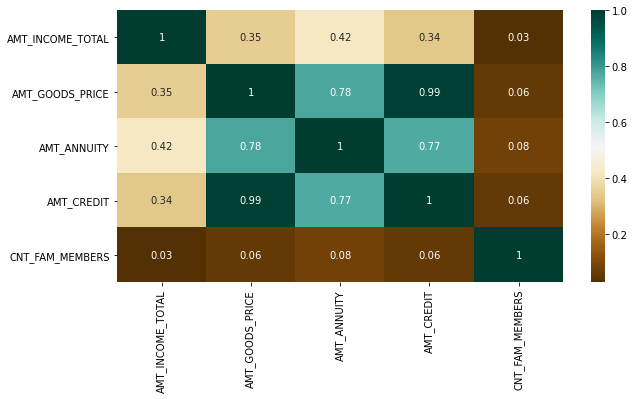

In [106]:
print("Correlation for Target_0 (Non_defaulters)")
plt.figure(figsize=(10,5))
sns.heatmap(round(app_target_0.corr(),2),cmap="BrBG",annot=True)
plt.show()

#### Observations:
Target_0 have almost same kind of relation as like target_1.


#### 4.4 Perform univariate for numerical variables 

In [107]:
app_target_Yes.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,EMERGENCYSTATE_MODE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_Binned,AMT_CREDIT_Binned
0,1,100002,Cash loans,M,202500.0,Unaccompanied,Working,Secondary / secondary special,-637,Laborers,Business Entity Type 3,0,0,0,0,0,1,351000.0,406597.5,24700.5,-9461,No,Single / not married,Y,2,2.0,2.0,0,1.0,200000-225000,400000-450000
26,1,100031,Cash loans,F,112500.0,Unaccompanied,Working,Secondary / secondary special,-2628,Cooking staff,Business Entity Type 3,0,0,0,0,2,2,702000.0,979992.0,27076.5,-18724,Yes,Widow,Y,2,0.0,1.0,0,1.0,100000-125000,900000 and above
40,1,100047,Cash loans,M,202500.0,Unaccompanied,Commercial associate,Secondary / secondary special,-1262,Laborers,Business Entity Type 3,0,0,0,2,0,4,855000.0,1193580.0,35028.0,-17482,No,Married,Y,2,0.0,0.0,0,2.0,200000-225000,900000 and above
42,1,100049,Cash loans,F,135000.0,Unaccompanied,Working,Secondary / secondary special,-3597,Sales staff,Self-employed,0,0,0,0,0,2,238500.0,288873.0,16258.5,-13384,No,Civil marriage,N,3,0.0,0.0,0,2.0,125000-150000,250000-300000
81,1,100096,Cash loans,F,81000.0,Unaccompanied,Pensioner,Secondary / secondary special,365243,Others,XNA,0,0,0,0,0,0,252000.0,252000.0,14593.5,-24794,No,Married,Y,2,1.0,1.0,0,2.0,"75000,100000",250000-300000


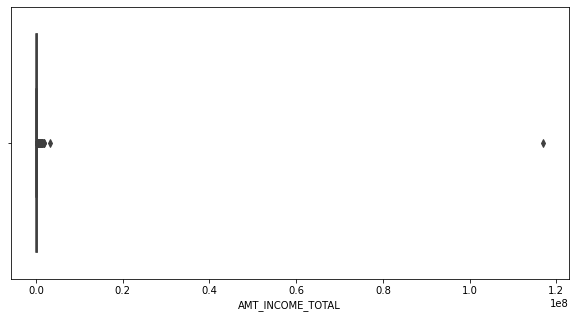

In [108]:
##Analysing for income amount
plt.figure(figsize=(10,5))
sns.boxplot(app_target_Yes.AMT_INCOME_TOTAL)
plt.show()

In [109]:
app_target_Yes.AMT_INCOME_TOTAL.describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### Observations:
               We can see outlier in AMT_INCOME_TOTAL for Targetvalue 1
               Since mean is affected by outlier we can see differnce in mean and median value.

In [110]:
## Analysing for Credit amount
app_target_Yes.AMT_CREDIT.describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

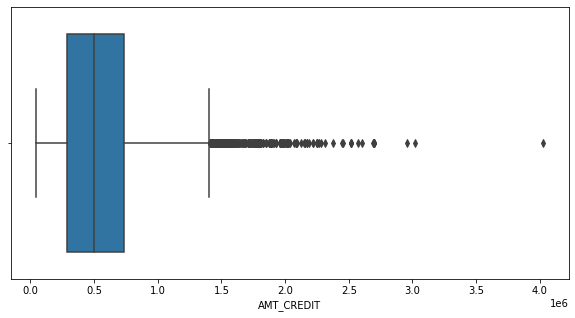

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(app_target_Yes.AMT_CREDIT)
plt.show()

#### Observations:            
We can see that most of the values are above IQR value.

In [112]:
## Analysing Annuity
app_target_Yes.AMT_ANNUITY.describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

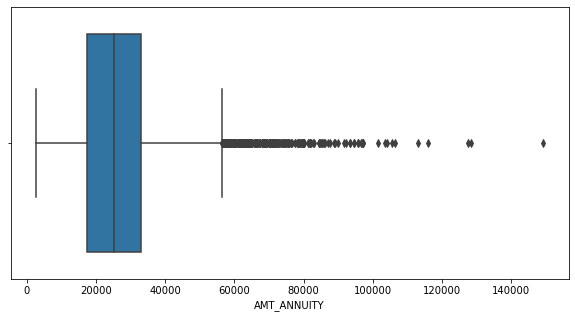

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(app_target_Yes.AMT_ANNUITY)
plt.show()

 #### Observations:          
            As we can see most values are abopve IQR.

#### 4.5 Bivariate analysis for numerical values 

Plot For Target 1


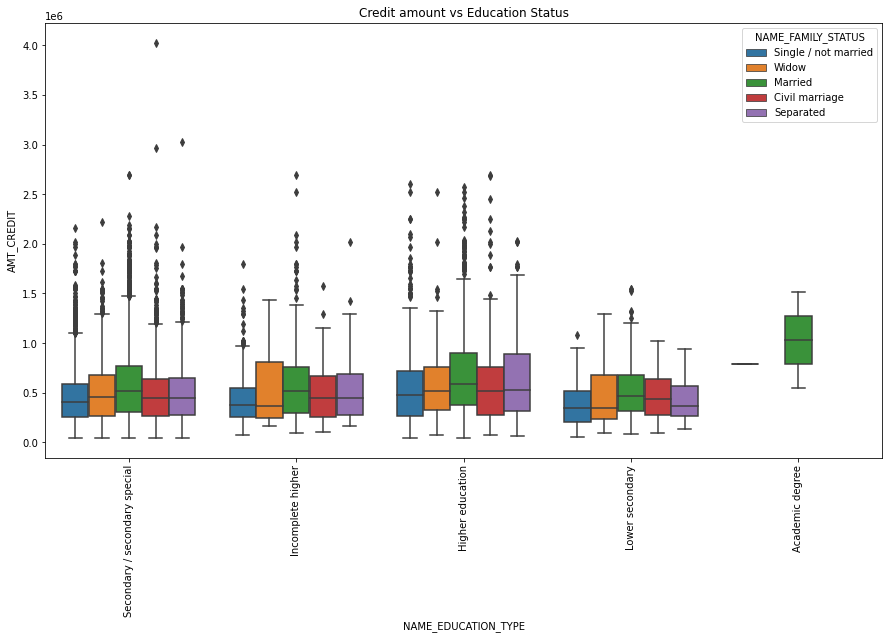

In [114]:
## Finding relation between Education_type and Credit_amount.  
print("Plot For Target 1")
plt.figure(figsize=(15,8))
sns.boxplot(data=app_target_Yes,x='NAME_EDUCATION_TYPE',y="AMT_CREDIT",hue="NAME_FAMILY_STATUS")
plt.title("Credit amount vs Education Status")
plt.xticks(rotation=90)
plt.show()

Plot For Target 0


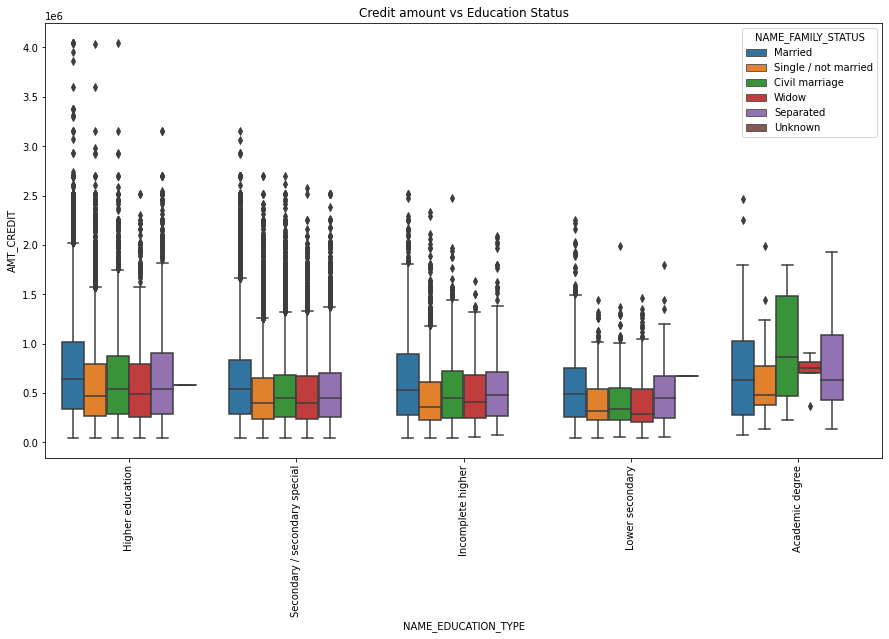

In [115]:
## Finding relation between Education_type and Credit_amount.  
print("Plot For Target 0")
plt.figure(figsize=(15,8))
sns.boxplot(x='NAME_EDUCATION_TYPE',y="AMT_CREDIT",hue="NAME_FAMILY_STATUS",data=app_target_No)
plt.title("Credit amount vs Education Status")
plt.xticks(rotation=90)
plt.show()

##### Observations:
1. Family status of "Married","civil marriage",and "seperated" with higher education background have more outliers.
2. People holding academic degree and civil marriage status have most of values in third quartile.
3. Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
4. Lower secondary have less income compared to others.


#### Relation between Income and Education for target

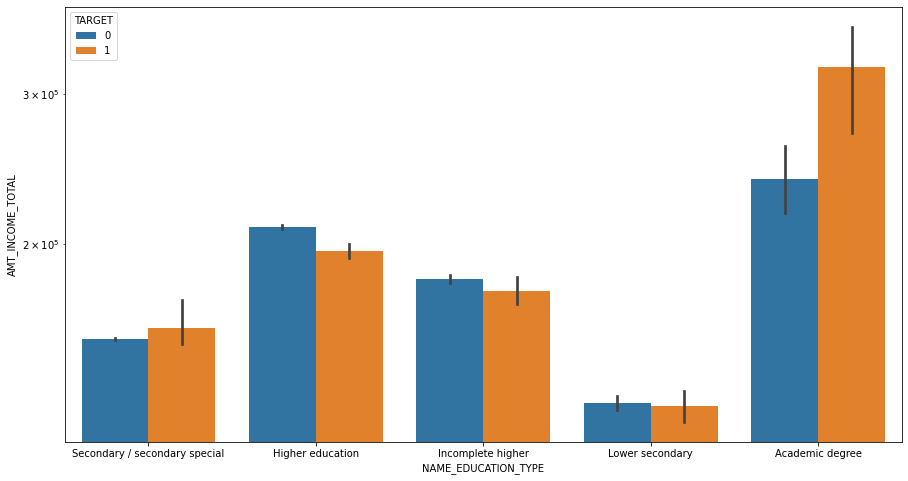

In [116]:
plt.figure(figsize=(15,8))
plt.yscale('log')
sns.barplot(x="NAME_EDUCATION_TYPE" , y="AMT_INCOME_TOTAL" , hue="TARGET",data=app_subset)
plt.show()

##### Observations:
1. People with academic degree have more income compared to others and they show more tendancy to make default.
2. People with 'Lower secondary' education have less income amount than others.
3. People with'Higher education' will pay loan on time. 

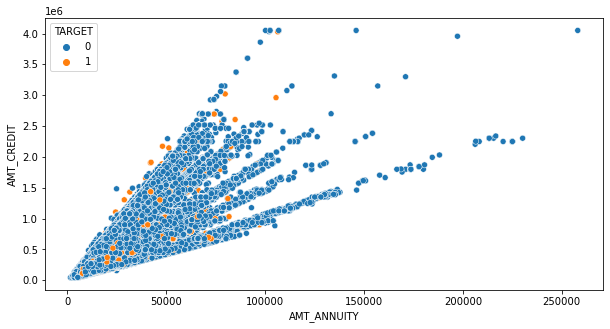

In [117]:
# Comparing annuity and credit amount.
plt.figure(figsize=(10,5))
sns.scatterplot(x="AMT_ANNUITY",y="AMT_CREDIT",hue="TARGET",data=app_subset)
plt.show()

##### Observations:
More values are observed between 0 and 100000.Target_1 is very low compared to target_0.<br>
We can see few outliers among people who will make loan payment on time.

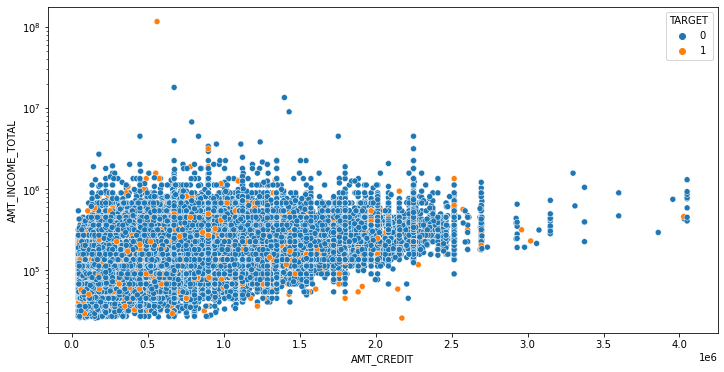

In [118]:
## relation between credit_amount and income_amount
plt.figure(figsize=(12,6))
plt.yscale('log')
sns.scatterplot(x="AMT_CREDIT",y="AMT_INCOME_TOTAL",hue="TARGET",data=app_subset)
plt.show()

##### Observations:
1. We can observe more values in between 0 and 2500000.
2. Very few outliers are in  where loan is paid on time for higher total income above 100000
3. Beyond credit amount 2500000 ,we can see less default.

## 5.Merge Previous_Application data with application_data

In [119]:
df_previous_app=pd.read_csv(r"C:\Users\Prabitha's PC\Documents\DS2021\EDA\Eda case study dataset\previous_application.csv")

In [120]:
df_previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df_previous_app.shape

(1670214, 37)

In [122]:
df_previous_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [123]:
df_previous_app.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [124]:
df_previous_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:>

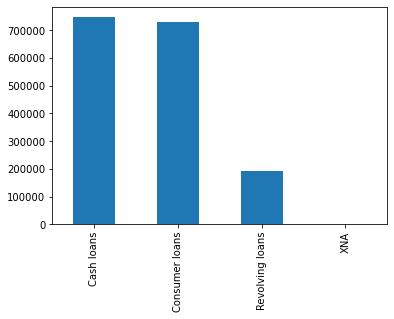

In [125]:
df_previous_app.NAME_CONTRACT_TYPE.value_counts().plot.bar()

In [126]:
df_previous_app.AMT_DOWN_PAYMENT.value_counts()

 0.000          369854
 4500.000        21241
 9000.000        14747
 13500.000        9655
 22500.000        8165
 6750.000         7709
 2250.000         6241
 18000.000        4526
 45000.000        4059
 2700.000         3362
 3150.000         3086
 11250.000        2937
 3600.000         2678
 5400.000         2220
 27000.000        2148
 4950.000         1722
 5850.000         1688
 1800.000         1657
 4050.000         1614
 31500.000        1479
 36000.000        1300
 6300.000         1268
 15750.000        1243
 2475.000         1235
 2925.000         1137
 7200.000         1126
 3375.000          988
 8100.000          983
 67500.000         973
 7650.000          962
 0.900             928
 2025.000          803
 3825.000          791
 2245.500          780
 90000.000         756
 9900.000          756
 3145.500          710
 2695.500          701
 20250.000         671
 3595.500          670
 4495.500          655
 9450.000          643
 1575.000          637
 2.250     

          Most of them have 0 as downpayment.

In [127]:
df_previous_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)  

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [128]:
# We can remove column with 'XNA',"XAP" values.We can consider them as input error or junk values.
df_previous_app=df_previous_app.drop(df_previous_app[df_previous_app["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index)


In [129]:
df_previous_app=df_previous_app.drop(df_previous_app[df_previous_app["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index)


In [130]:
df_previous_app.shape

(69635, 37)

In [131]:
df_previous_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

Repairs                             0.341280
Other                               0.224140
Urgent needs                        0.120801
Buying a used car                   0.041473
Building a house or an annex        0.038673
Everyday expenses                   0.034695
Medicine                            0.031220
Payments on other loans             0.027730
Education                           0.022589
Journey                             0.017793
Purchase of electronic equipment    0.015237
Buying a new car                    0.014533
Wedding / gift / holiday            0.013815
Buying a home                       0.012422
Car repairs                         0.011445
Furniture                           0.010756
Buying a holiday home / land        0.007654
Business development                0.006118
Gasification / water supply         0.004308
Buying a garage                     0.001953
Hobby                               0.000790
Money for a third person            0.000359
Refusal to

<AxesSubplot:>

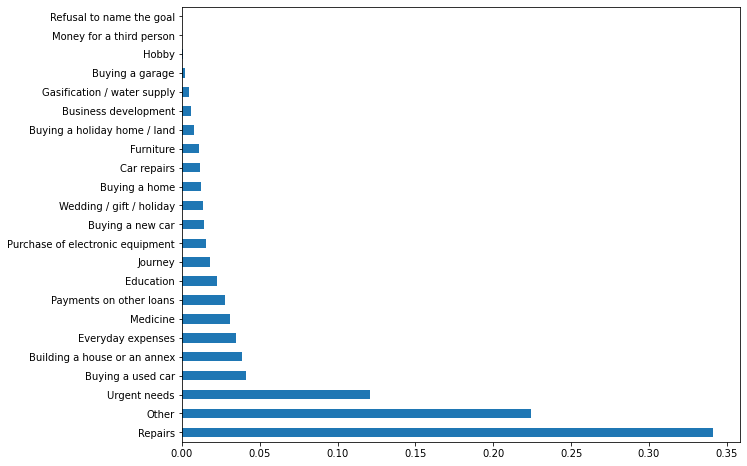

In [132]:
plt.figure(figsize=(10,8))
df_previous_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.barh()

### Observations:
More loans are taken for "repair" purpose.

In [133]:
## Merging previous application with current application(app_subset)
df_main_app=pd.merge(app_subset,df_previous_app,how="left",on='SK_ID_CURR')

In [134]:
df_main_app.shape

(331007, 67)

In [135]:
df_main_app.describe()

,TARGET,SK_ID_CURR,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_x,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,331007.000000,331007.000000,3.310070e+05,331007.000000,331007.000000,331007.000000,331007.000000,331007.000000,331007.000000,331007.000000,3.310070e+05,3.310070e+05,331007.000000,331007.000000,331007.000000,331007.000000,331007.000000,331007.000000,331007.000000,5.941300e+04,59179.000000,5.941300e+04,5.941300e+04,6174.0,5.941300e+04,59413.000000,59413.000000,6174.0,0.0,0.0,59413.000000,59413.000000,59179.000000,21142.0,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000
mean,0.085473,278147.749845,1.701381e+05,62312.636488,0.005526,0.006121,0.030141,0.239602,0.239569,1.773156,5.355586e+05,5.960023e+05,27094.552870,-16023.054274,2.031017,0.100726,0.144616,0.416493,2.153507,1.935293e+06,25684.687286,4.519988e+05,5.079813e+05,0.0,4.519988e+05,12.175147,0.999108,0.0,NaN,NaN,-631.822833,9.513675,29.555552,365243.0,-634.408713,-110.906206,77561.239665,79121.611721,0.706839
std,0.279584,102846.024327,2.301958e+05,139999.299168,0.078098,0.103934,0.191117,0.893018,0.747402,1.977313,3.672340e+05,4.000220e+05,14426.190337,4345.484501,0.500148,0.363891,0.449650,0.722563,0.910242,5.301690e+05,17400.744545,4.943563e+05,5.396833e+05,0.0,4.943563e+05,3.216941,0.029854,0.0,NaN,NaN,526.999047,131.046191,17.660545,0.0,6187.951784,712.200406,149915.510979,150990.299139,0.455222
min,0.000000,100002.000000,2.565000e+04,-17912.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.050000e+04,4.500000e+04,1615.500000,-25229.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000125e+06,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.0,NaN,NaN,-2406.000000,-1.000000,5.000000,365243.0,-2367.000000,-2209.000000,-2209.000000,-2203.000000,0.000000
25%,0.000000,189034.000000,1.125000e+05,-2754.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.385000e+05,2.700000e+05,16573.500000,-19650.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.479931e+06,13608.045000,1.350000e+05,1.528200e+05,0.0,1.350000e+05,10.000000,1.000000,0.0,NaN,NaN,-686.000000,-1.000000,12.000000,365243.0,-728.000000,-358.000000,-533.000000,-524.000000,0.000000
50%,0.000000,278323.000000,1.530000e+05,-1219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.500000e+05,5.099220e+05,24916.500000,-15734.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.941703e+06,21389.895000,2.475000e+05,3.049245e+05,0.0,2.475000e+05,12.000000,1.000000,0.0,NaN,NaN,-490.000000,-1.000000,24.000000,365243.0,-571.000000,-35.000000,-283.000000,-277.000000,1.000000
75%,0.000000,367273.500000,2.025000e+05,-307.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,6.795000e+05,8.086500e+05,34587.000000,-12406.000000,2.000000,0.000000,0.000000,1.000000,3.000000,2.390904e+06,32681.250000,5.850000e+05,6.750000e+05,0.0,5.850000e+05,15.000000,1.000000,0.0,NaN,NaN,-305.000000,0.000000,48.000000,365243.0,-418.000000,332.000000,-48.000000,-42.000000,1.000000
max,1.000000,456255.000000,1.170000e+08,365243.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,4.050000e+06,4.050000e+06,258025.500000,-7489.000000,3.000000,24.000000,34.000000,19.000000,20.000000,2.845265e+06,418058.145000,4.050000e+06,4.104351e+06,0.0,4.050000e+06,23.000000,1.000000,0.0,NaN,NaN,-2.000000,12102.000000,60.000000,365243.0,365243.

In [136]:
df_main_app.head()

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_GOODS_PRICE_x,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,EMERGENCYSTATE_MODE,NAME_FAMILY_STATUS,FLAG_OWN_REALTY,REGION_RATING_CLIENT_W_CITY,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_Binned,AMT_CREDIT_Binned,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,100002,Cash loans,M,202500.0,Unaccompanied,Working,Secondary / secondary special,-637,Laborers,Business Entity Type 3,0,0,0,0,0,1,351000.0,406597.5,24700.5,-9461,No,Single / not married,Y,2,2.0,2.0,0,1.0,200000-225000,400000-450000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,100003,Cash loans,F,270000.0,Family,State servant,Higher education,-1188,Core staff,School,0,0,0,0,0,0,1129500.0,1293502.5,35698.5,-16765,No,Married,N,1,0.0,0.0,0,2.0,250000-275000,900000 and above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,100004,Revolving loans,M,67500.0,Unaccompanied,Working,Secondary / secondary special,-225,Laborers,Government,0,0,0,0,0,0,135000.0,135000.0,6750.0,-19046,No,Single / not married,Y,2,0.0,0.0,0,1.0,50000-75000,0-150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,100006,Cash loans,F,135000.0,Unaccompanied,Working,Secondary / secondary special,-3039,Laborers,Business Entity Type 3,0,0,0,0,0,0,297000.0,312682.5,29686.5,-19005,No,Civil marriage,Y,2,0.0,0.0,0,2.0,125000-150000,300000-350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,100007,Cash loans,M,121500.0,Unaccompanied,Working,Secondary / secondary special,-3038,Core staff,Religion,0,0,0,0,0,0,513000.0,513000.0,21865.5,-19932,No,Single / not married,Y,2,0.0,0.0,0,1.0,100000-125000,500000-550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
df_main_app.dtypes

TARGET                            int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
AMT_INCOME_TOTAL                float64
NAME_TYPE_SUITE_x                object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
DAYS_EMPLOYED                     int64
OCCUPATION_TYPE                  object
ORGANIZATION_TYPE                object
AMT_REQ_CREDIT_BUREAU_HOUR        int32
AMT_REQ_CREDIT_BUREAU_DAY         int32
AMT_REQ_CREDIT_BUREAU_WEEK        int32
AMT_REQ_CREDIT_BUREAU_MON         int32
AMT_REQ_CREDIT_BUREAU_QRT         int32
AMT_REQ_CREDIT_BUREAU_YEAR        int32
AMT_GOODS_PRICE_x               float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
DAYS_BIRTH                        int64
EMERGENCYSTATE_MODE              object
NAME_FAMILY_STATUS               object
FLAG_OWN_REALTY                  object
REGION_RATING_CLIENT_W_CITY       int64


#### 5.1.Univariate analysis on merged dataframes.

In [138]:
## Analysing combined dataframe to find numerical and categorical variables.
df_main_app.nunique().sort_values()

RATE_INTEREST_PRIVILEGED            0
RATE_INTEREST_PRIMARY               0
DAYS_FIRST_DRAWING                  1
NAME_GOODS_CATEGORY                 1
RATE_DOWN_PAYMENT                   1
FLAG_LAST_APPL_PER_CONTRACT         1
AMT_DOWN_PAYMENT                    1
NAME_CONTRACT_TYPE_y                1
TARGET                              2
NAME_PORTFOLIO                      2
NFLAG_LAST_APPL_IN_DAY              2
FLAG_OWN_REALTY                     2
EMERGENCYSTATE_MODE                 2
NFLAG_INSURED_ON_APPROVAL           2
NAME_CONTRACT_TYPE_x                2
NAME_PRODUCT_TYPE                   3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
NAME_CONTRACT_STATUS                4
NAME_PAYMENT_TYPE                   4
NAME_CLIENT_TYPE                    4
NAME_EDUCATION_TYPE                 5
NAME_YIELD_GROUP                    5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
PRODUCT_COMBINATION                 7
WEEKDAY_APPR

In [139]:
df_main_app.CODE_GENDER.value_counts()

F      217708
M      113295
XNA         4
Name: CODE_GENDER, dtype: int64

               Most of applicants are females

In [140]:
df_main_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    73734
XNA                       58244
Self-employed             41800
Other                     17902
Medicine                  12074
Business Entity Type 2    11273
Government                11198
School                     9535
Trade: type 7              8569
Kindergarten               7369
Construction               7286
Business Entity Type 1     6500
Transport: type 4          5870
Trade: type 3              3794
Industry: type 9           3592
Security                   3554
Industry: type 3           3521
Housing                    3179
Industry: type 11          2911
Military                   2736
Bank                       2700
Agriculture                2667
Police                     2473
Trade: type 2              2416
Postal                     2341
Transport: type 2          2283
Security Ministries        2070
Restaurant                 1964
Services                   1646
University                 1420
Industry: type 7           1414
Transpor

<AxesSubplot:>

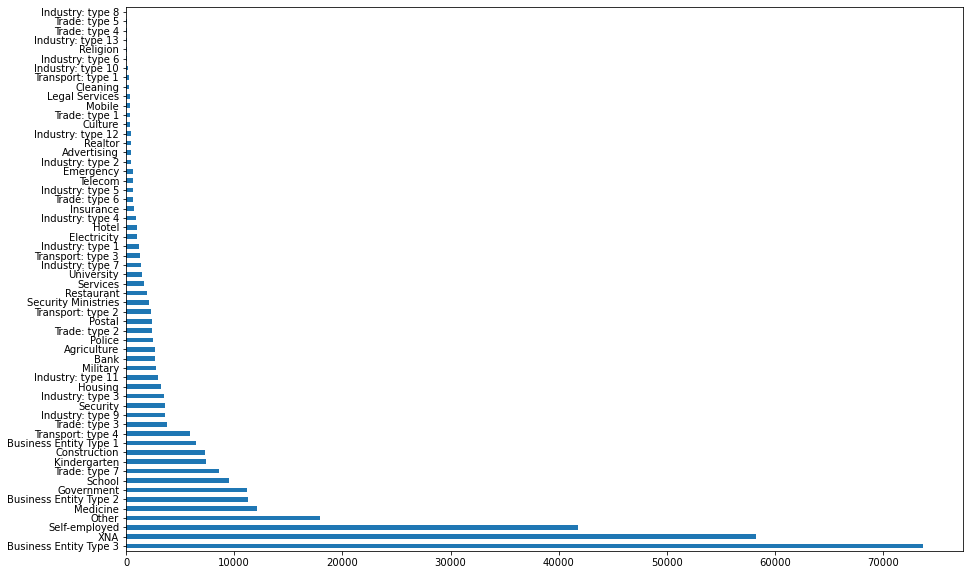

In [141]:
plt.figure(figsize=(15,10))
df_main_app.ORGANIZATION_TYPE.value_counts().plot.barh()

 Business Entity Type 3 contribute high proportion in ORGANIZATION_TYPE.


In [142]:
df_main_app.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    235609
Higher education                  80137
Incomplete higher                 11036
Lower secondary                    4057
Academic degree                     168
Name: NAME_EDUCATION_TYPE, dtype: int64

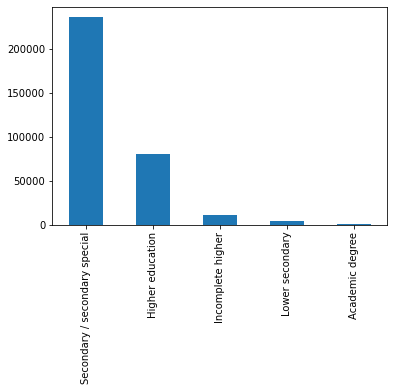

In [143]:
df_main_app.NAME_EDUCATION_TYPE.value_counts().plot.bar()
plt.show()

Secondary / secondary special education type contribute high.

#### 5.2 Bivariate analysis on merged loan dataset

 #### Distribution of purposes with target 

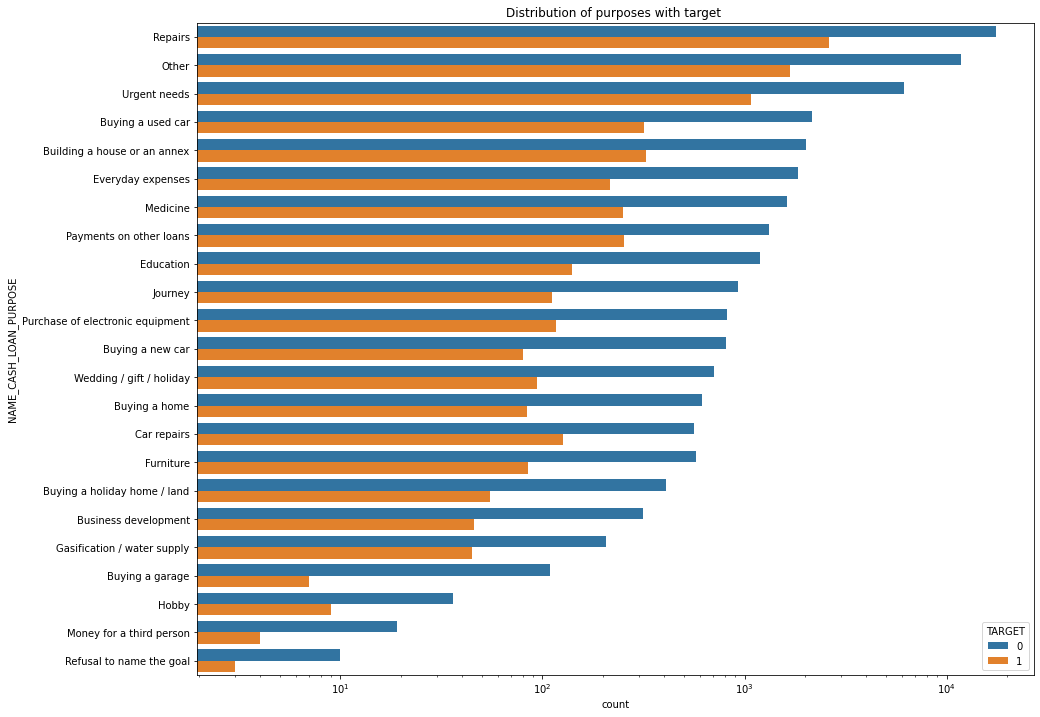

In [144]:
plt.figure(figsize=(15,12))
plt.xscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data=df_main_app, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_main_app['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
plt.show()

##### Observations

1. Loan taken for purpose of 'repair' faces more difficulty in payment on time.
2. In some cases such as 'Education','Buying a garage','Business developemt','Buying land',and 'Buying car'etc we can see that loan payment is significantly higher than facing difficulties. 


#### Distribution of contract status with purposes

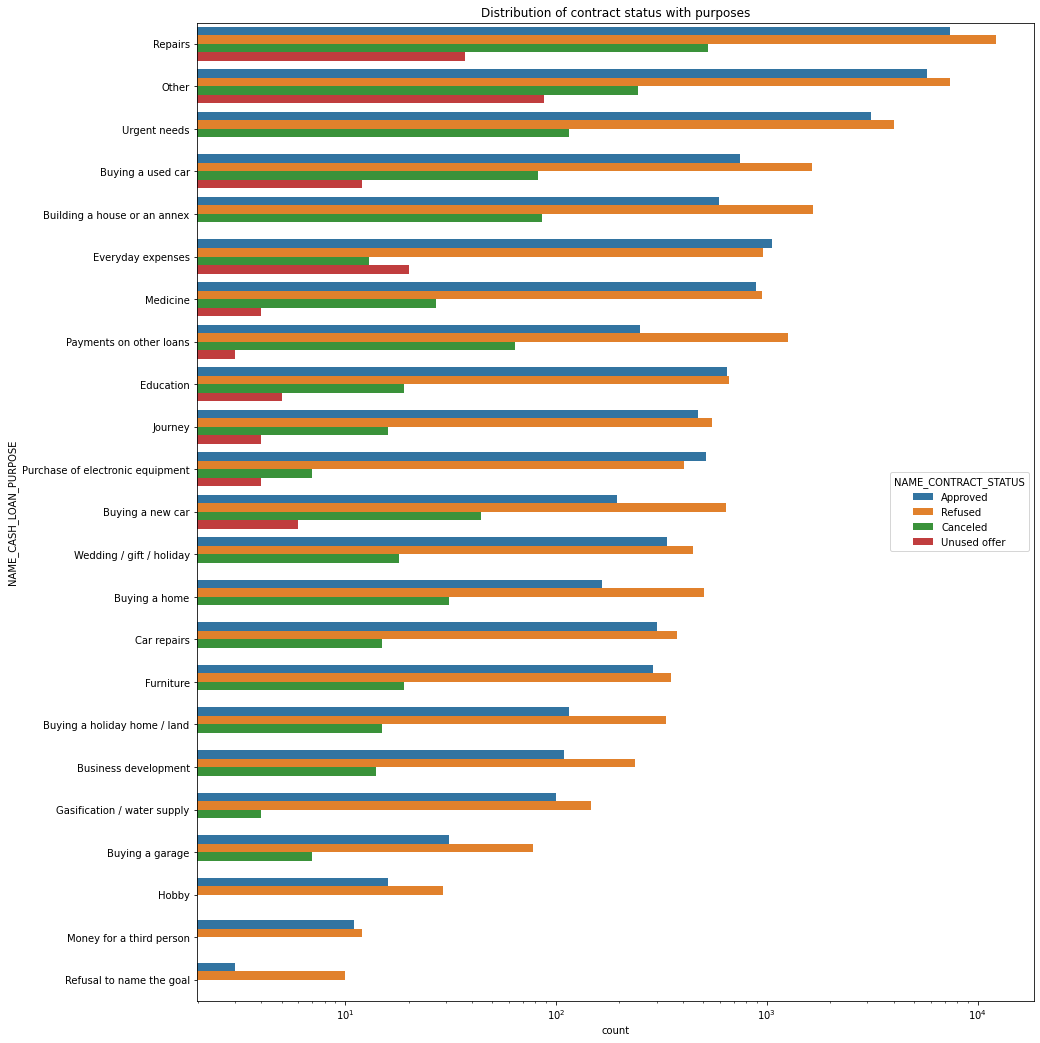

In [145]:
plt.figure(figsize=(15,18))
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
sns.countplot(data=df_main_app, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_main_app['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

#### Observations: 

1. Loan taken for purpose of 'repair' faces more rejection.
2. For 'Education purpose' we can see almost same number of approval and rejection.
3. 'Buying new car' and 'paying other loan' have more rate of rejection than approval.
4. Purchase of electronic equipments and loan taken for everyday expenses have more more approval rate.



#### 5.2 Bivariate analysis on merged loan dataset

In [146]:
df_main_app.CNT_PAYMENT.value_counts()

12.0    12428
36.0     9725
60.0     9047
24.0     8930
18.0     6831
48.0     5768
6.0      4556
30.0     1241
42.0      485
54.0      133
20.0       12
10.0        2
15.0        2
19.0        2
39.0        2
23.0        2
21.0        2
22.0        2
45.0        2
13.0        1
5.0         1
26.0        1
14.0        1
17.0        1
33.0        1
16.0        1
Name: CNT_PAYMENT, dtype: int64

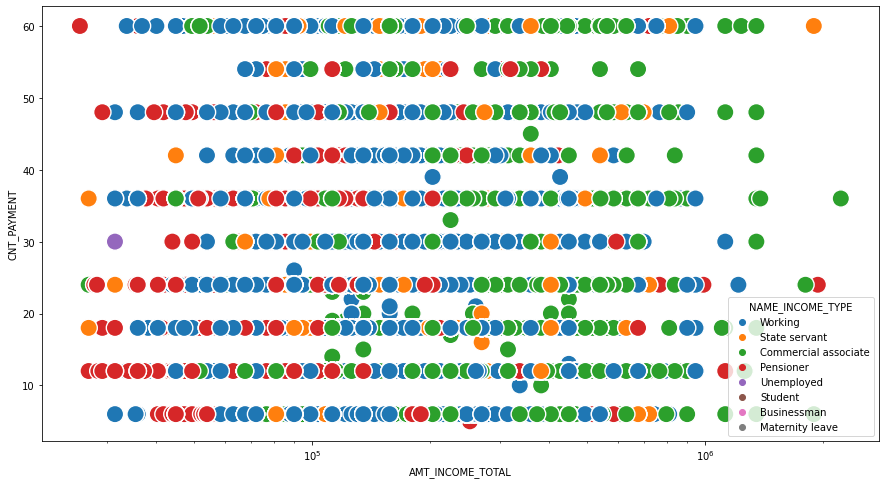

In [147]:
plt.figure(figsize=(15,8))
plt.xscale('log')
sns.scatterplot(x="AMT_INCOME_TOTAL" , y="CNT_PAYMENT" , hue="NAME_INCOME_TYPE",data=df_main_app,s=300)
plt.show()

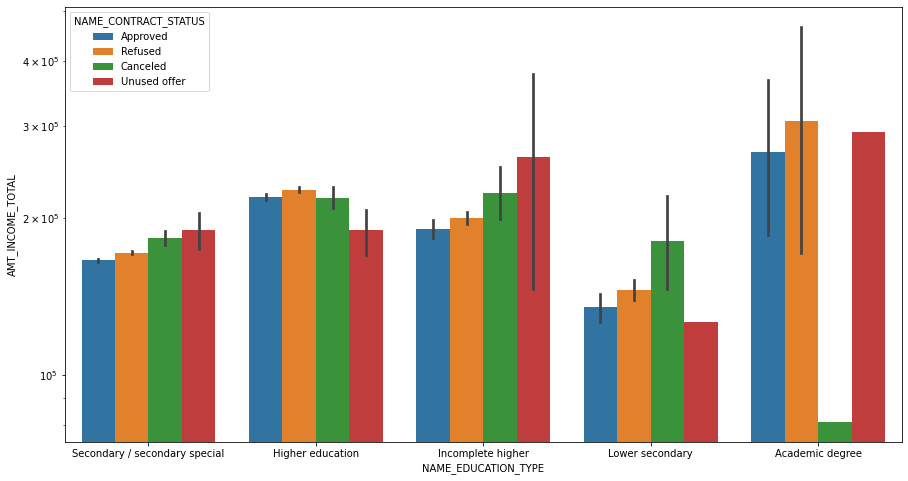

In [148]:
plt.figure(figsize=(15,8))
plt.yscale('log')
sns.barplot(x="NAME_EDUCATION_TYPE" , y="AMT_INCOME_TOTAL" , hue="NAME_CONTRACT_STATUS",data=df_main_app)
plt.show()

### Observations:


 Clients with high income,and academic have more rate of loan approval than others.

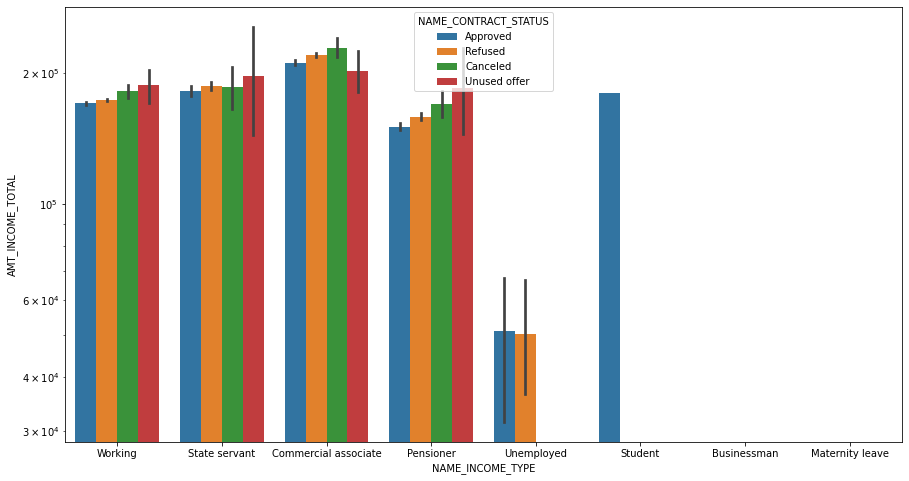

In [149]:
plt.figure(figsize=(15,8))
plt.yscale('log')
sns.barplot(x="NAME_INCOME_TYPE" , y="AMT_INCOME_TOTAL" , hue="NAME_CONTRACT_STATUS",data=df_main_app)
plt.show()

#### Observations: 
Students always make use of loans.

## Conclusion

1. Bank should focus on `working`with less income,as they have made more unsuccessful payments.
2. Bank can provide more loan to  ‘Student’ ,’pensioner’ and ‘Businessman as they have made more successful payment.
3. People with Academic Degree are more likely to repay the loan only 0.0198% have not repaid the loan.
4. Loan taken for the purpose ‘Repair’ is having higher number of unsuccessful payments on time.
5. Single/non_married class contribute 17% defaulters ,so more risk is associated with them.
6. Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others

